In [1]:
from sklearn.externals import joblib # to save model

from P300.data import load_data

# confusion matrix
from sklearn import metrics
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


import matplotlib.pyplot as plt
%matplotlib inline 


%load_ext autoreload
%autoreload 2

import numpy as np

In [2]:
# load classifier 
#subject='A'
#subject='B'
model_folder='model'
subject_train='AandB'
#clf_name = 'LR'
clf_name = 'SVM'
num_ch=64
clf_filename="{}/{}_{}_ch{}.model".format(model_folder, subject_train, clf_name,num_ch)
clf = joblib.load(clf_filename)
print(clf)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=5000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)


In [3]:
# calc prob for test 
subject_test = 'A'
#test_subject = 'B'
#X_train, Y_train, Code_train = load_data(subject, 'train', 85)
X_test, Y_test, Code_test = load_data(subject_test, 'test', 100)

loaded:
(100, 180, 896)
(100, 180, 1)
(100, 180, 1)
stacked:
(18000, 896)
(18000,)
(18000,)


In [4]:
# test
Y_est=clf.predict(X_test)

accuracy = sum(Y_test==Y_est) / len(Y_test)
print(accuracy)

metrics.confusion_matrix(Y_test,Y_est,labels=(1,-1))

0.7814444444444445


array([[  576,  2424],
       [ 1510, 13490]])

In [5]:
def predict_proba_SVM(clf, X, a, b):
    f = clf.decision_function(X_test)
    
    prob = 1.0/(1+np.exp(f*a+b))
    return prob

def predict_log_proba_SVM(clf, X, a, b):
    
    return np.log(predict_proba_SVM(clf, X, a, b))
    

(array([7.000e+00, 1.100e+01, 6.900e+01, 6.690e+02, 3.493e+03, 7.855e+03,
        4.982e+03, 8.510e+02, 5.300e+01, 1.000e+01]),
 array([-3.99380526, -3.61636557, -3.23892587, -2.86148617, -2.48404647,
        -2.10660678, -1.72916708, -1.35172738, -0.97428768, -0.59684799,
        -0.21940829]),
 <a list of 10 Patch objects>)

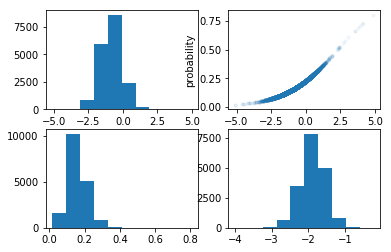

In [8]:
# for SVM
from sklearn.svm.classes import LinearSVC


clf.classes_
clf.__class__  #is sklearn.svm.classes.LinearSVC
if type(clf) is LinearSVC: 
    
    f = clf.decision_function(X_test)
    
    # load Platt coefficients a and b 
    #(a,b) = np.loadtxt('model/{}_SVM_ab.txt'.format(model_subject))
    (a,b) = np.loadtxt('model/{}_SVM_ab.txt'.format(subject_train))
    
    prob = predict_proba_SVM(clf, X_test, a, b)
    log_prob = predict_log_proba_SVM(clf, X_test, a, b)

plt.subplot(221)    
plt.hist(f)
plt.subplot(222)    
plt.plot(f, prob, '.', alpha=0.05)
plt.xlabel('f')
plt.ylabel('probability')
plt.subplot(223)
plt.hist(prob)    
plt.subplot(224)
plt.hist(log_prob)    

In [9]:
max(log_prob)

-0.21940828796785816

In [10]:
if hasattr( clf, 'predict_log_prob'):
    # predict prob
    prob = clf.predict_proba(X_test)
    plt.hist(prob)

    log_prob = clf.predict_log_proba(X_test)
    #plt.hist(log_prob)

In [11]:
np.max(log_prob)

-0.21940828796785816

In [12]:
prob.shape

(18000,)

In [13]:
X_test.shape

(18000, 896)

In [14]:
log_prob.shape

(18000,)

In [ ]:
plt.hist(log_prob[:,0])

In [ ]:
plt.hist(log_prob[:,1]-log_prob[:,0])

## decode after averaging over trials

In [15]:
from P300.data import sort_by_code

XX, YY, CC= sort_by_code(X_test, Y_test, Code_test)

In [16]:
print(XX.shape)
print(YY.shape)
print(CC.shape)

(18000, 896)
(18000, 1)
(18000, 1)


In [17]:
# calc log prob for SVM
if type(clf) is LinearSVC: 
    log_prob = predict_log_proba_SVM(clf, XX, a, b)
log_prob = log_prob.reshape(-1,15,12)
print(log_prob.shape)    

# accumulate log_prob over trials
log_prob_diff=np.sum(log_prob,axis=1)
print(log_prob_diff.shape)


(100, 15, 12)
(100, 12)


In [18]:
# calc log prob for other classifiers
if hasattr( clf, 'predict_log_prob'):
    #Yest=clf.predict(XX)
    #clf.score(XX, YY)
    log_prob = clf.predict_log_proba(XX)
    log_prob=log_prob.reshape(-1,15,12,2)
    print(log_prob.shape)

    # accumulate log_prob over trials
    log_prob_diff=np.sum(log_prob,axis=1)[:,:,1]-np.sum(log_prob,axis=1)[:,:,0]
    print(log_prob_diff.shape)

In [19]:
YY = YY.reshape(-1,15,12)
YY.shape
#YY[1,:,1]
YY_trial=YY[:,0,:]
YY_trial.shape

(100, 12)

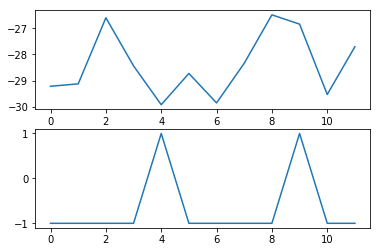

In [20]:
epoch = 0
plt.subplot(211)
plt.plot(log_prob_diff[epoch,:])
plt.subplot(212)
plt.plot(YY_trial[epoch,:])

In [21]:
np.sum(log_prob_diff > 0 , axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(100, 12)


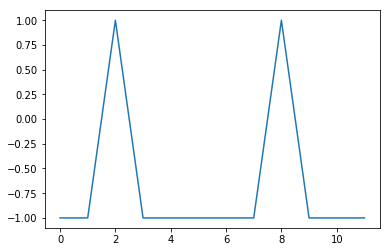

In [22]:
from P300.data import decode_rc

decoded = decode_rc(log_prob_diff)
print(decoded.shape)
plt.plot(decoded[epoch,:])

In [23]:
from P300.data import calc_accuracy_rc

calc_accuracy_rc(YY_trial, decoded)

0.03